In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


C:\Users\Deepak kumar\AppData\Local\Temp\ipykernel_16480\4015471215.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(r"C:\Users\Deepak kumar\OneDrive\Desktop\Machine_learning\retail_sales.csv")

print(data.head())
print("")
print(data.columns)

          Date      Sales
0  1/1/15 0:00  54.048619
1  1/1/15 1:00  50.161596
2  1/1/15 2:00  55.954939
3  1/1/15 3:00  56.553261
4  1/1/15 4:00  60.487874

Index(['Date', 'Sales'], dtype='object')


In [3]:
data.columns = data.columns.str.strip() 
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') 
data.set_index('Date', inplace=True) 

print(data.head())
print(data.info())

C:\Users\Deepak kumar\AppData\Local\Temp\ipykernel_16480\3560513408.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


                         Sales
Date                          
2015-01-01 00:00:00  54.048619
2015-01-01 01:00:00  50.161596
2015-01-01 02:00:00  55.954939
2015-01-01 03:00:00  56.553261
2015-01-01 04:00:00  60.487874
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52585 entries, 2015-01-01 00:00:00 to 2020-12-31 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   52585 non-null  float64
dtypes: float64(1)
memory usage: 821.6 KB
None


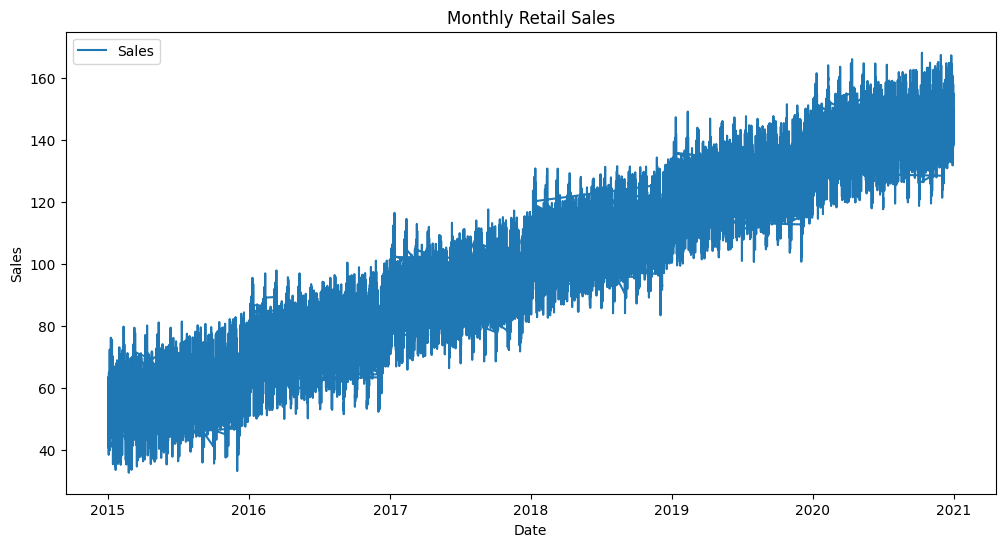

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 205s 5ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 2/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 212s 5ms/step - loss: 5.7960e-04 - val_loss: 6.0451e-04
Epoch 3/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 202s 5ms/step - loss: 5.3412e-04 - val_loss: 0.0010
Epoch 4/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 202s 5ms/step - loss: 5.1823e-04 - val_loss: 0.0018
Epoch 5/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 262s 5ms/step - loss: 5.0719e-04 - val_loss: 6.7336e-04
Epoch 6/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 263s 5ms/step - loss: 5.0370e-04 - val_loss: 4.2957e-04
Epoch 7/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 308s 6ms/step - loss: 4.9706e-04 - val_loss: 4.6804e-04
Epoch 8/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 203s 5ms/step - loss: 4.8906e-04 - val_loss: 0.0010
Epoch 9/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 409s 10ms/step - loss: 4.7922e-04 - val_loss: 8.4745e-04
Epoch 10/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 1003s 5ms/step - loss: 4.7746e-04 - val_loss: 0.0011
Epoch 11/20
42057/420

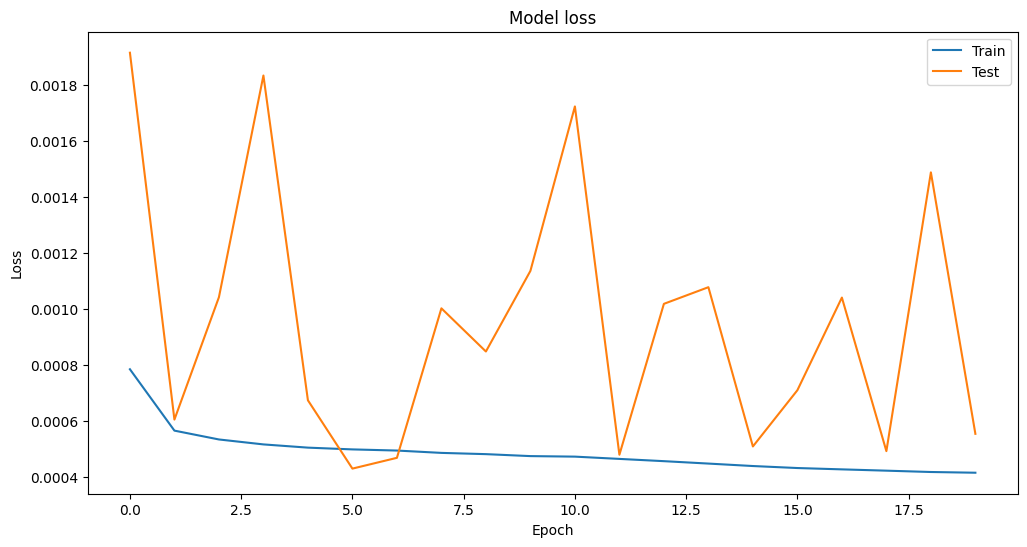

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Sales')
plt.title('Monthly Retail Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


data = data.dropna()

# scaling the values
scaler = MinMaxScaler(feature_range=(0, 1))
data['Sales'] = scaler.fit_transform(data['Sales'].values.reshape(-1,1))


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12
X, Y = create_dataset(data.values, look_back)

# Spliting the data
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, Y_train, batch_size=1, epochs=20, validation_data=(X_test, Y_test))

#save the model
model.save('retail_sales_forecasting_model.h5')

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Train Score: RMSE=2.60, MAE=2.07, R2=0.99
Test Score: RMSE=3.18, MAE=2.53, R2=0.90


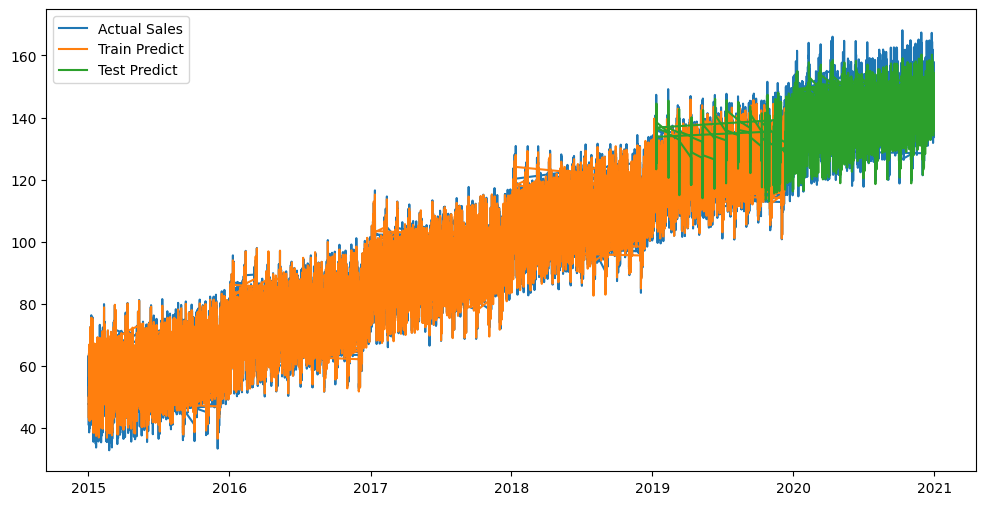

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\Deepak kumar\AppData\Local\Temp\ipykernel_16480\3021696581.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]


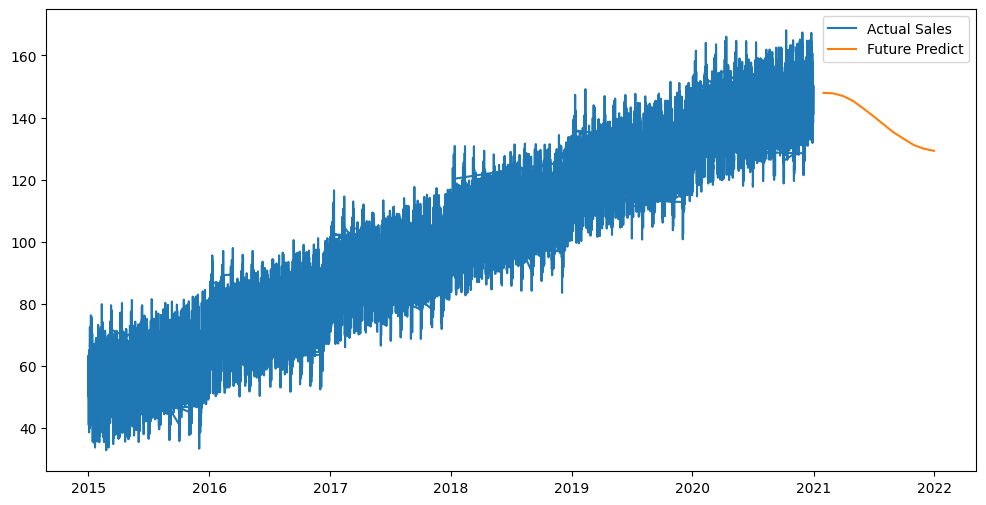

In [5]:
#Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))


train_score_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_score_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
train_score_mae = mean_absolute_error(Y_train, train_predict)
test_score_mae = mean_absolute_error(Y_test, test_predict)
train_score_r2 = r2_score(Y_train, train_predict)
test_score_r2 = r2_score(Y_test, test_predict)

print(f'Train Score: RMSE={train_score_rmse:.2f}, MAE={train_score_mae:.2f}, R2={train_score_r2:.2f}')
print(f'Test Score: RMSE={test_score_rmse:.2f}, MAE={test_score_mae:.2f}, R2={test_score_r2:.2f}')


plt.figure(figsize=(12, 6))


actual_sales = scaler.inverse_transform(data['Sales'].values.reshape(-1, 1))
plt.plot(data.index, actual_sales, label='Actual Sales')


train_plot = np.empty_like(data['Sales'])
train_plot[:] = np.nan
train_plot[look_back:len(train_predict) + look_back] = train_predict[:, 0]
plt.plot(data.index, train_plot, label='Train Predict')


test_plot = np.empty_like(data['Sales'])
test_plot[:] = np.nan
test_start_idx = len(train_predict) + (look_back * 2) + 1
test_end_idx = test_start_idx + len(test_predict)

if test_end_idx <= len(test_plot):
    test_plot[test_start_idx:test_end_idx] = test_predict[:, 0]
else:
    test_plot[test_start_idx:len(test_plot)] = test_predict[:len(test_plot) - test_start_idx, 0]

plt.plot(data.index, test_plot, label='Test Predict')

plt.legend()
plt.show()


future_steps = 12
last_values = data[-look_back:].values
future_predictions = []

for _ in range(future_steps):
    prediction = model.predict(last_values.reshape(1, look_back, 1))
    future_predictions.append(prediction[0, 0])
    last_values = np.append(last_values[1:], prediction[0, 0]).reshape(-1, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

#Future predictions
future_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]
plt.figure(figsize=(12, 6))
plt.plot(data.index, actual_sales, label='Actual Sales')
plt.plot(future_dates, future_predictions, label='Future Predict')
plt.legend()
plt.show()
